## Assignment 4: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a numeric, continuous outcome such as a house price, typically optimized with losses like MSE/SSE or MAE, while classification predicts a categorical label such as spam vs. not-spam and is usually evaluated with metrics like cross-entropy, accuracy, precision/recall, and AUC.

2. A confusion table is a count table of true positives, true negatives, false positives, and false negatives, and it helps us see not just how often a classifier is right but also the specific types of mistakes it makes, which in turn supports calculations of accuracy, precision, recall, specificity, and composite scores like F1.

3. The SSE quantifies the total squared deviation of predictions from the observed values, so smaller SSE means predictions are closer on average, with squaring making the metric more sensitive to large errors and outliers.

4. Overfitting occurs when a model is too complex and captures noise in the training data, leading to very low training error but high test error. Underfitting occurs when a model is too simple to capture the underlying pattern, yielding high error on both training and test sets.

5. Splitting data into training and testing sets and choosing k based on test accuracy or SSE improves performance because it selects the model that best generalizes to unseen data rather than the one that merely fits the training set, although a separate validation set or cross-validation should be used for tuning to avoid biasing the final test estimate.

6. Reporting a hard class label is simple but discards information about uncertainty and depends on an often arbitrary threshold, whereas reporting a probability distribution preserves uncertainty, enables threshold tuning and ranking, and supports cost-sensitive decisions, albeit at the cost of being harder to communicate and potentially misleading if the probabilities are not well calibrated.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Dimensions before dropping NAs: (2499, 3)
NA counts:
 price      0
year       0
mileage    0
dtype: int64
Dimensions after dropping NAs: (2499, 3)

Head:
    price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Train size: 1999 | Test size: 500
k=  3 | Test MSE = 148,104,157.19


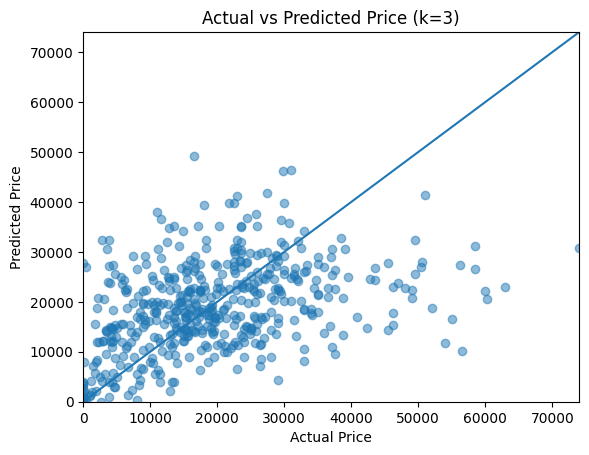

k= 10 | Test MSE = 117,399,126.11


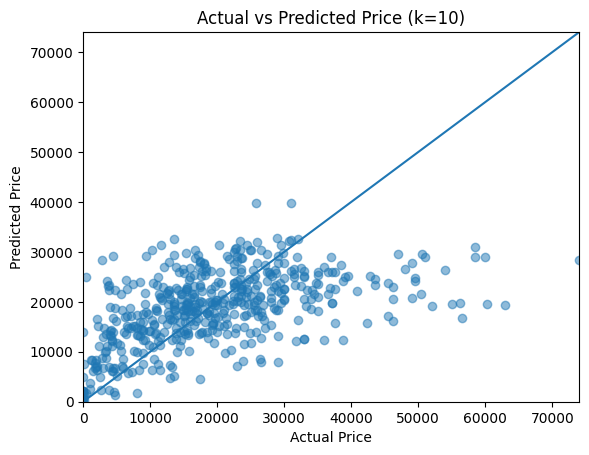

k= 25 | Test MSE = 112,600,455.16


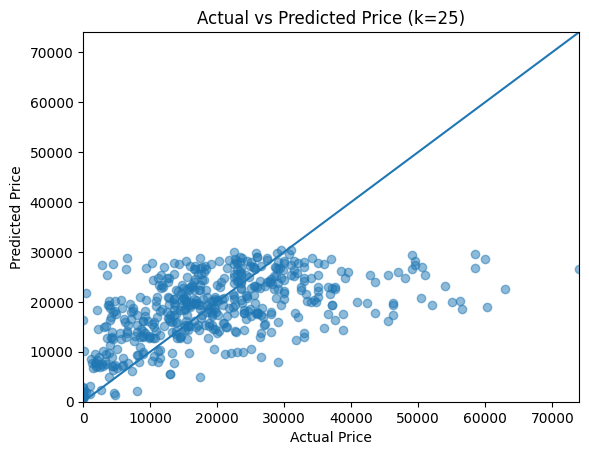

k= 50 | Test MSE = 110,202,287.21


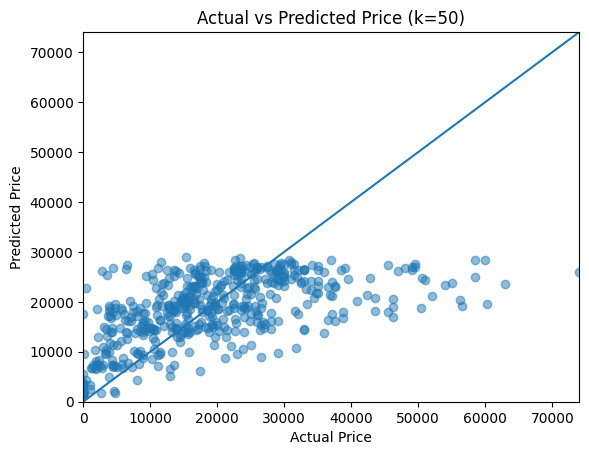

k=100 | Test MSE = 112,250,845.49


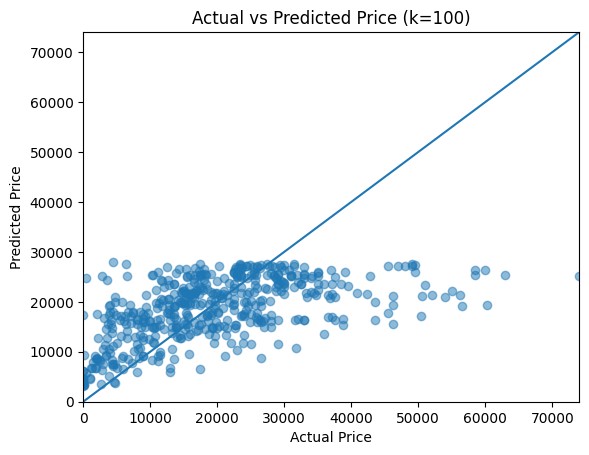

k=300 | Test MSE = 114,497,778.22


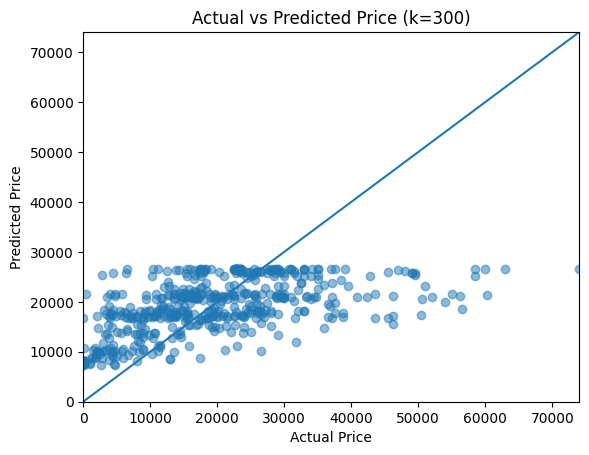


Optimal k (min test MSE): 50 | MSE = 110,202,287.21


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1) Load, keep columns, check NAs, show head/dims
df_raw = pd.read_csv("./data/USA_cars_datasets.csv")
df = df_raw[["price", "year", "mileage"]].copy()
print("Dimensions before dropping NAs:", df.shape)
print("NA counts:\n", df.isna().sum())
df = df.dropna(subset=["price", "year", "mileage"]).copy()
print("Dimensions after dropping NAs:", df.shape)
print("\nHead:\n", df.head())

# 2) Min–max normalize features
scaler = MinMaxScaler()
X = df[["year", "mileage"]].to_numpy()
y = df["price"].to_numpy(dtype=float)
X_scaled = scaler.fit_transform(X)

# 3) 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("\nTrain size:", X_train.shape[0], "| Test size:", X_test.shape[0])

# 4) Fit kNN for various k
k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights="uniform", metric="minkowski", p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((k, mse))
    print(f"k={k:>3} | Test MSE = {mse:,.2f}")

    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted Price (k={k})")
    lo = min(np.min(y_test), np.min(y_pred))
    hi = max(np.max(y_test), np.max(y_pred))
    plt.plot([lo, hi], [lo, hi])
    plt.xlim(lo, hi)
    plt.ylim(lo, hi)
    plt.show()

# 5) Optimal k by min test MSE
best_k, best_mse = sorted(mse_results, key=lambda t: t[1])[0]
print(f"\nOptimal k (min test MSE): {best_k} | MSE = {best_mse:,.2f}")


1. Code above. There are no missing values in the data

2. Code above.

3. Code above.

4. As k increases, predictions smooth out: small k gives noisy, scattered points, while large k pulls predictions into a narrow band near the overall average price, visibly underpredicting expensive cars and overpredicting cheap ones.

5. On this split, the lowest test MSE occurred at k=50.

6. For small k, the model overfits: points are very scattered around the line because predictions swing with the shift of a few neighbors. For very large k, the model underfits: points collapse toward a horizontal band, missing high and low prices due to excessive averaging. Around k=50, the cloud tightens around the line without collapsing, reflecting a healthier balance between flexibility and smoothing.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.